# Data scrapping

## Preparation

In [13]:
## Uncomment if used in Google Colab
!git init .
!git remote add origin https://github.com/new5558/Chula-course-recommender-proof-of-concept
!git pull origin master
!pip install -r requirements.txt

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/new5558/Chula-course-recommender-proof-of-concept
 * branch            master     -> FETCH_HEAD
Already up to date.


In [14]:
from bs4 import BeautifulSoup
import requests
import time
from multiprocessing import Pool
from tqdm import tqdm

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
page = requests.get("http://www.academic.chula.ac.th/search/search.asp?Page=473&Keys=&Fac=allfac&Se=Courses")
page

<Response [200]>

In [17]:
soup = BeautifulSoup(page.content.decode('cp874'), 'html.parser')

In [18]:
subject_tables = soup.select('table[cellpadding="5"]')[1:-1]

In [19]:
def get_course_info(course_second_tr, is_thai):
  cousrse_tds = course_second_tr.find_all('td')
  output = {
      "course_no": cousrse_tds[0].get_text().strip(),
      "course_name": cousrse_tds[1].get_text().strip(),
  }

  if not is_thai:
      output["course_abberviation"] = cousrse_tds[2].get_text().strip()
  
  return output

In [20]:
def get_course_description(course_third_tr):
  cousrse_tds = course_third_tr.find_all('td')
  return cousrse_tds[1].get_text().strip()

In [21]:
all_courses = []
for subject_table in subject_tables:
  subject_tr = subject_table.find_all('tr')
  course = get_course_info(subject_tr[1], False)
  course['description'] = get_course_description(subject_tr[2])
  all_courses.append(course)

In [22]:
all_courses

[{'course_abberviation': 'HRM PUB SEC',
  'course_name': 'Human Resource Management in Public Sector',
  'course_no': '2404637',
  'description': 'Principles, concepts, and process of human resource management in public sector, including positions system in civil servant and others, career system, wage and incentive system, problems and challenges for public human resource management.'},
 {'course_abberviation': 'HRP PUB SEC',
  'course_name': 'Human Resource Planning in Public Sector',
  'course_no': '2404638',
  'description': 'Principles and concepts of human resource planning in public organizations, linkages between human resource planning and other organization planning as well as organization strategy. Techniques in forecasting demand and supply of human resource as well as deployment of human resource planning is also included.'},
 {'course_abberviation': 'PM PUB SEC',
  'course_name': 'Performance Management in Public Sector',
  'course_no': '2404639',
  'description': 'Concep

In [23]:
# program_starts = time.time()
# while(True):
#     now = time.time()
#     print("It has been {0} seconds since the loop started".format(now - program_starts))

In [24]:
# all_courses = []
# program_starts = time.time()
# for i in range(1, 1269):
#   page = requests.get(f"http://www.academic.chula.ac.th/search/search.asp?Page={i}&Keys=&Fac=allfac&Se=Courses")
#   soup = BeautifulSoup(page.content, 'html.parser')
#   subject_tables = soup.select('table[cellpadding="5"]')[1:-1]
#   for subject_table in subject_tables:
#     subject_tr = subject_table.find_all('tr')
#     course = get_course_info(subject_tr[1])
#     course['description'] = get_course_description(subject_tr[2])
#     all_courses.append(course)
#   now = time.time()
#   print("It has been {0} seconds since the loop started".format(now - program_starts), i)

## Scrap English course

In [25]:
def get_data(i):
  all_courses_in_page = []
  page = requests.get(f"http://www.academic.chula.ac.th/search/search.asp?Page={i}&Keys=&Fac=allfac&Se=Courses")
  soup = BeautifulSoup(page.content.decode('cp874'), 'html.parser')
  subject_tables = soup.select('table[cellpadding="5"]')[1:-1]
  for subject_table in subject_tables:
    subject_tr = subject_table.find_all('tr')
    course = get_course_info(subject_tr[1], False)
    course['description'] = get_course_description(subject_tr[2])
    all_courses_in_page.append(course)
  return all_courses_in_page

In [27]:
result = None

program_starts = time.time()

# print(get_data)

with Pool(8) as p:
  result = list(tqdm(p.imap(get_data, range(1, 1269)), total=1269 - 1))

now = time.time()
print("It has been {0} seconds since the loop started".format(now - program_starts))

In [ ]:
import functools
import operator
result = functools.reduce(operator.iconcat, result, [])

In [ ]:
len(result)

In [ ]:
result

In [ ]:
import csv

keys = result[0].keys()

with open('./data/course_chula.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(result)

## Scrap Thai courses

In [ ]:
def get_data_thai(i):
  all_courses_in_page = []
  page = requests.get(f"http://www.academic.chula.ac.th/search/searchthai.asp?Page={i}&Keys=&Fac=allfac&Se=Courses")
  soup = BeautifulSoup(page.content.decode('cp874'), 'html.parser')
  subject_tables = soup.select('table[cellpadding="5"]')[1:-1]
  for subject_table in subject_tables:
    subject_tr = subject_table.find_all('tr')
    course = get_course_info(subject_tr[1], True)
    course['description'] = get_course_description(subject_tr[2])
    all_courses_in_page.append(course)
  return all_courses_in_page

In [ ]:
result_thai = None

program_starts = time.time()

# print(get_data)

with Pool(8) as p:
  result_thai = list(tqdm(p.imap(get_data_thai, range(1, 1269)), total=1269 - 1))

now = time.time()
print("It has been {0} seconds since the loop started".format(now - program_starts))

100%|██████████| 1268/1268 [21:34<00:00,  1.02s/it]

It has been 1294.4452540874481 seconds since the loop started


In [ ]:
import functools
import operator
result_thai = functools.reduce(operator.iconcat, result_thai, [])

In [ ]:
len(result_thai)

25357

In [ ]:
result_thai

[{'course_name': 'การเขียนภาษาไทยในที่ทำงาน',
  'course_no': '0123100',
  'description': 'หลักเกณฑ์ รูปแบบ และวิธีการเขียนงานเอกสารภาษาไทยประเภทต่างๆ ที่ใช้ทั่วไปในที่ทำงาน การใช้ภาษาที่ถูกต้องและเหมาะสมกับประเภทของเอกสาร ฝึการเขียนเอกสารในระบบการทำงานสำนักงาน'},
 {'course_name': 'การเขียนย่อหน้า',
  'course_no': '0123101',
  'description': 'การเรียงลำดับความคิดในการเขียนย่อหน้า การเลือกศัพท์ คำเชื่อม และวลีที่เหมาะสม การใช้ภาษาที่เหมาะสมกับจุดประสงค์ในการเขียนและระดับของผู้อ่าน'},
 {'course_name': 'ภาษาในการเขียนรายงาน',
  'course_no': '0123102',
  'description': 'โครงสร้างรายงานทางวิชาการ เชิงอรรถ และบรรณานุกรม การเขียนรายงานทางวิชาการแบบต่างๆ โดยเน้นการใช้ภาษาที่ชัดเจนและเหมาะสมกับงานทางวิชาการ'},
 {'course_name': 'การเขียนโครงการ',
  'course_no': '0123103',
  'description': 'โครงสร้างโครงการแบบต่างๆ โดยใช้ภาษาที่ชัดเจนและเหมาะสม'},
 {'course_name': 'การอ่านภาษาไทยระดับอุดมศึกษา',
  'course_no': '0123104',
  'description': 'หลักการอ่าน ระดับของการอ่าน การจับใจความ การตีความบทอ่านประ

In [ ]:
import csv

keys = result_thai[0].keys()

with open('./data/course_chula_thai.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(result_thai)

# Aggregate and clean data from CSV



## Import Library and Data

In [ ]:
import pandas as pd
from tqdm import tqdm

from tqdm.autonotebook import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


In [ ]:
df_courses_eng = pd.read_csv('./data/course_chula.csv')
df_courses_thai = pd.read_csv('./data/course_chula_thai.csv')

In [ ]:
df_courses_thai['course_no'].apply(lambda x: len(x)).value_counts()

7    25309
6       47
4        1
Name: course_no, dtype: int64

In [ ]:
df_courses_eng['course_no'].apply(lambda x: len(x)).value_counts()

7    25315
6       44
4        1
Name: course_no, dtype: int64

## Data Aggregation

In [ ]:
df_courses_eng.dtypes

course_no              object
course_name            object
course_abberviation    object
description            object
dtype: object

In [ ]:
df_courses = pd.merge(df_courses_eng, df_courses_thai, left_on=['course_no'], right_on=['course_no'])

In [ ]:
df_courses

,course_no,course_name_x,course_abberviation,description_x,course_name_y,description_y
0,0123100,Thai Writing in Workplace,THAI WRIT WORK,"Principles, formats and methods of writing Tha...",การเขียนภาษาไทยในที่ทำงาน,หลักเกณฑ์ รูปแบบ และวิธีการเขียนงานเอกสารภาษาไ...
1,0123101,Paragraph Writing,PARAGRAP WRITING,Organizing ideas in paragraph writing; selecti...,การเขียนย่อหน้า,การเรียงลำดับความคิดในการเขียนย่อหน้า การเลือก...
2,0123102,Language in Report Writing,LANG REP WRIT,"Academic report structures, footnotes and bibl...",ภาษาในการเขียนรายงาน,โครงสร้างรายงานทางวิชาการ เชิงอรรถ และบรรณานุก...
3,0123103,Proposal Writing,PROPOSAL WRITING,Writing various types of proposals with emphas...,การเขียนโครงการ,โครงสร้างโครงการแบบต่างๆ โดยใช้ภาษาที่ชัดเจนแล...
4,0123104,University Level of Thai Reading,UNIV THAI READING,Reading principles; levels of reading; main id...,การอ่านภาษาไทยระดับอุดมศึกษา,หลักการอ่าน ระดับของการอ่าน การจับใจความ การตี...
...,...,...,...,...,...,...
25249,6303620,Petroleum Exploration and Production,PETROL EXPLO PROD,Petroleum geology; petroleum exploration and g...,การสำรวจและการผลิตปิโตรเลียม,ธรณีวิทยาปิโตรเลียม การสำรวจปิโตรเลียมและธรณีฟ...
25250,6303621,PETROL BUS,NaN,อุตสาหกรรมปิโตรเลียมและการกลั่นน้ำมัน เศรษฐศาส...,ธุรกิจปิโตรเลียม: โครงสร้าง โลจิสติกส์ และเศรษ...,Petroleum industry and refinery; economics; ch...
25251,6303622,Advances in Petroleum Technology,ADV PETROL TECH,Discussions on special topics related to advan...,ความก้าวหน้าด้านเทคโนโลยีปิโตรเลียม,การอภิปรายหัวข้อพิเศษที่เกี่ยวข้องกับความก้าวห...
25252,6303623,Selected Topics in Oil and Gas Production,SEL OIL GAS,Various aspects related to the new and up to d...,วิชาเลือกเฉพาะด้านในการผลิตน้ำมันดิบและก๊าซธรร...,เนื้อหาวิชาครอบคลุม พัฒนาการและความเปลี่ยนแปลง...


In [ ]:
df_courses.columns

Index(['course_no', 'course_name_x', 'course_abberviation', 'description_x',
       'course_name_y', 'description_y'],
      dtype='object')

In [ ]:
df_courses = df_courses.rename(columns={'course_name_x': 'course_name', 'description_x': 'description', 'course_name_y': 'course_name_thai', 'description_y': 'description_thai'})

In [ ]:
df_courses

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
0,0123100,Thai Writing in Workplace,THAI WRIT WORK,"Principles, formats and methods of writing Tha...",การเขียนภาษาไทยในที่ทำงาน,หลักเกณฑ์ รูปแบบ และวิธีการเขียนงานเอกสารภาษาไ...
1,0123101,Paragraph Writing,PARAGRAP WRITING,Organizing ideas in paragraph writing; selecti...,การเขียนย่อหน้า,การเรียงลำดับความคิดในการเขียนย่อหน้า การเลือก...
2,0123102,Language in Report Writing,LANG REP WRIT,"Academic report structures, footnotes and bibl...",ภาษาในการเขียนรายงาน,โครงสร้างรายงานทางวิชาการ เชิงอรรถ และบรรณานุก...
3,0123103,Proposal Writing,PROPOSAL WRITING,Writing various types of proposals with emphas...,การเขียนโครงการ,โครงสร้างโครงการแบบต่างๆ โดยใช้ภาษาที่ชัดเจนแล...
4,0123104,University Level of Thai Reading,UNIV THAI READING,Reading principles; levels of reading; main id...,การอ่านภาษาไทยระดับอุดมศึกษา,หลักการอ่าน ระดับของการอ่าน การจับใจความ การตี...
...,...,...,...,...,...,...
25249,6303620,Petroleum Exploration and Production,PETROL EXPLO PROD,Petroleum geology; petroleum exploration and g...,การสำรวจและการผลิตปิโตรเลียม,ธรณีวิทยาปิโตรเลียม การสำรวจปิโตรเลียมและธรณีฟ...
25250,6303621,PETROL BUS,NaN,อุตสาหกรรมปิโตรเลียมและการกลั่นน้ำมัน เศรษฐศาส...,ธุรกิจปิโตรเลียม: โครงสร้าง โลจิสติกส์ และเศรษ...,Petroleum industry and refinery; economics; ch...
25251,6303622,Advances in Petroleum Technology,ADV PETROL TECH,Discussions on special topics related to advan...,ความก้าวหน้าด้านเทคโนโลยีปิโตรเลียม,การอภิปรายหัวข้อพิเศษที่เกี่ยวข้องกับความก้าวห...
25252,6303623,Selected Topics in Oil and Gas Production,SEL OIL GAS,Various aspects related to the new and up to d...,วิชาเลือกเฉพาะด้านในการผลิตน้ำมันดิบและก๊าซธรร...,เนื้อหาวิชาครอบคลุม พัฒนาการและความเปลี่ยนแปลง...


## Clean Data

In [ ]:
df_courses.isna().sum()

course_no               0
course_name             0
course_abberviation    12
description             9
course_name_thai        2
description_thai        0
dtype: int64

In [ ]:
df_courses[df_courses.isna().any(axis=1)]

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
1308,2102562,ICT Infrastructure for EMS-WAMS Applications,ICT INFRA EMS WAMS,ICT infrastructure in smart grid; automatic me...,NaN,โครงสร้างพื้นฐานด้านเทคโนโลยีสารสนเทศและการสื่...
2922,2111696,"Introduction to Nuclear Safety, Security, and ...",INTRO NSS LAW,Introduction to Nuclear Safety; Nuclear Securi...,NaN,ความรู้พื้นฐานของความปลอดภัยทางนิวเคลียร์ ความ...
3612,2200158,APP LING TTFL,NaN,ภาษาศาสตร์ประยุกต์สำหรับการเรียนการสอนภาษาไทยใ...,ภาษาศาสตร์ประยุกต์เพื่อการสอนภาษาไทยในฐานะภาษา...,Applied linguistics for learning and teaching ...
5414,2223022,COM JAP S/T II,NaN,Speaking and listening skills in basic Japanes...,ภาษาญี่ปุ่นเพื่อการสื่อสารสำหรับนิสิตสายวิทยาศ...,ทักษะการพูดและฟังภาษาญี่ปุ่นเบื้องต้น คำศัพท์แ...
8451,2313390,Industrial Training II,INDUST TRAINING II,NaN,การฝึกงานในโรงงานอุตสาหกรรม 2,การฝึกงานในโรงพิมพ์ (เกี่ยวกับกระบวนการพิมพ์แบ...
10831,2602636,BUSINESS ORGANIZATION CONSULTING,NaN,"Roles and responsibility of consultants, both ...",-,-
11607,2701720,THEORY OF DEVELOPMENT EDUCATION,THEORY DEV ED,NaN,เรื่องคัดเฉพาะทางศาสนากับการศึกษา,วิเคราะห์ประเด็นสำคัญทางศาสนากับการศึกษาเรื่อง...
12941,2725286,ENG LIS SPEAK ELEM,NaN,Principles and strategies for listening; liste...,ทักษะการฟังและการพูดภาษาอังกฤษสำหรับครูประถมศึกษา,หลักและกลวิธีการฟัง การฟังเพื่อความเข้าใจ การฟ...
13765,2756703,ADV QUAN&QUAL RES,NaN,Conceptualization and design of quantitative a...,การออกแบบการวิจัยเชิงปริมาณและเชิงคุณลักษณะขั้...,การสร้างมโนทัศน์และการออกแบบงานวิจัยเชิงปริมาณ...
13945,2759713,MORAL ETH INSTR,NaN,"Concepts and methods of enhancing knowledge, u...",การเรียนการสอนคุณธรรมและจริยธรรมในสังคมที่เปลี...,แนวคิดและวิธีการสร้างเสริมความรู้ ความเข้าใจ ท...


In [ ]:
(df_courses == '-').sum()

course_no                 0
course_name               0
course_abberviation      34
description            1929
course_name_thai        614
description_thai       2298
dtype: int64

In [ ]:
df_courses = df_courses.fillna('-')

In [ ]:
(df_courses == '-').sum()

course_no                 0
course_name               0
course_abberviation      46
description            1938
course_name_thai        616
description_thai       2298
dtype: int64

In [ ]:
df_courses_text_count = df_courses.apply(lambda x: x.str.len())
df_courses_text_count

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
0,7,25,14,213,25,170
1,7,17,16,175,15,139
2,7,26,13,139,20,134
3,7,16,16,79,15,54
4,7,32,17,140,28,128
...,...,...,...,...,...,...
25249,7,36,17,152,28,172
25250,7,10,1,178,53,157
25251,7,32,15,117,35,110
25252,7,41,11,97,51,125


In [ ]:
## Find mismatch data
(df_courses_text_count <= 0).sum()

course_no              0
course_name            0
course_abberviation    0
description            0
course_name_thai       0
description_thai       0
dtype: int64

In [ ]:
df_courses_text_count.max()

course_no                 7
course_name              98
course_abberviation      49
description            1659
course_name_thai        100
description_thai       1519
dtype: int64

In [ ]:
df_courses_text_count.mean()

course_no                6.998139
course_name             30.699216
course_abberviation     14.115190
description            216.307040
course_name_thai        27.255247
description_thai       194.909994
dtype: float64

In [ ]:
df_courses_text_count.median()

course_no                7.0
course_name             29.0
course_abberviation     15.0
description            199.0
course_name_thai        26.0
description_thai       177.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f406a42ba10>,
      dtype=object)

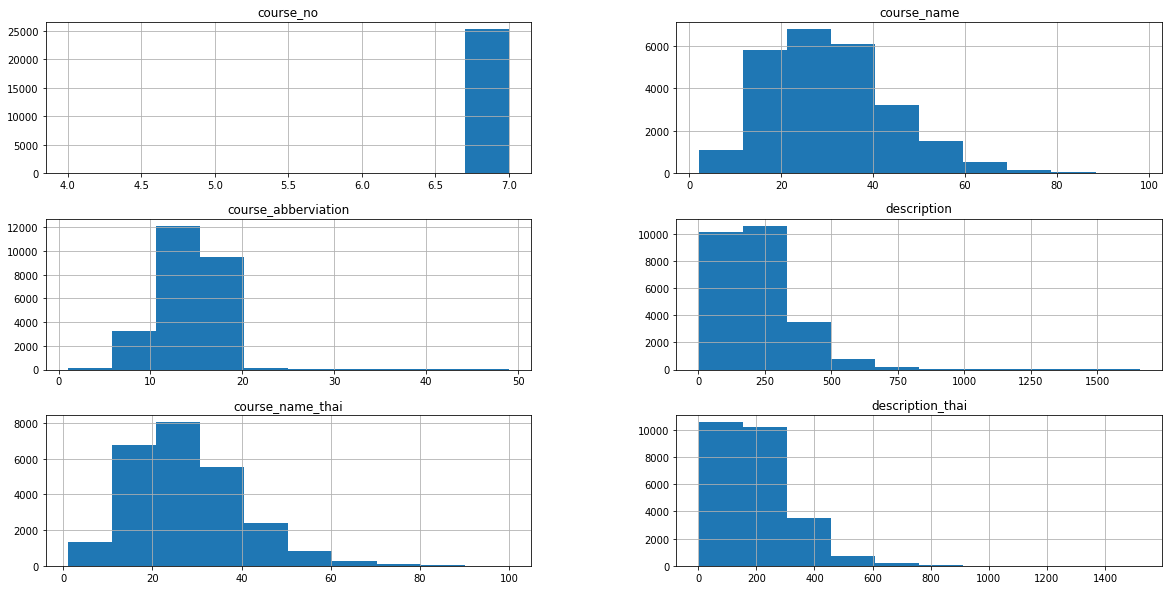

In [ ]:
# Find outlier by plotting histogram
df_courses_text_count.hist(figsize=(20, 10))

In [ ]:
df_courses

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
0,0123100,Thai Writing in Workplace,THAI WRIT WORK,"Principles, formats and methods of writing Tha...",การเขียนภาษาไทยในที่ทำงาน,หลักเกณฑ์ รูปแบบ และวิธีการเขียนงานเอกสารภาษาไ...
1,0123101,Paragraph Writing,PARAGRAP WRITING,Organizing ideas in paragraph writing; selecti...,การเขียนย่อหน้า,การเรียงลำดับความคิดในการเขียนย่อหน้า การเลือก...
2,0123102,Language in Report Writing,LANG REP WRIT,"Academic report structures, footnotes and bibl...",ภาษาในการเขียนรายงาน,โครงสร้างรายงานทางวิชาการ เชิงอรรถ และบรรณานุก...
3,0123103,Proposal Writing,PROPOSAL WRITING,Writing various types of proposals with emphas...,การเขียนโครงการ,โครงสร้างโครงการแบบต่างๆ โดยใช้ภาษาที่ชัดเจนแล...
4,0123104,University Level of Thai Reading,UNIV THAI READING,Reading principles; levels of reading; main id...,การอ่านภาษาไทยระดับอุดมศึกษา,หลักการอ่าน ระดับของการอ่าน การจับใจความ การตี...
...,...,...,...,...,...,...
25249,6303620,Petroleum Exploration and Production,PETROL EXPLO PROD,Petroleum geology; petroleum exploration and g...,การสำรวจและการผลิตปิโตรเลียม,ธรณีวิทยาปิโตรเลียม การสำรวจปิโตรเลียมและธรณีฟ...
25250,6303621,PETROL BUS,-,อุตสาหกรรมปิโตรเลียมและการกลั่นน้ำมัน เศรษฐศาส...,ธุรกิจปิโตรเลียม: โครงสร้าง โลจิสติกส์ และเศรษ...,Petroleum industry and refinery; economics; ch...
25251,6303622,Advances in Petroleum Technology,ADV PETROL TECH,Discussions on special topics related to advan...,ความก้าวหน้าด้านเทคโนโลยีปิโตรเลียม,การอภิปรายหัวข้อพิเศษที่เกี่ยวข้องกับความก้าวห...
25252,6303623,Selected Topics in Oil and Gas Production,SEL OIL GAS,Various aspects related to the new and up to d...,วิชาเลือกเฉพาะด้านในการผลิตน้ำมันดิบและก๊าซธรร...,เนื้อหาวิชาครอบคลุม พัฒนาการและความเปลี่ยนแปลง...


## Use language detector to find error text (Extra clean data)

In [ ]:
df_courses[df_courses['course_no'] == '6303621']

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
25250,6303621,PETROL BUS,-,อุตสาหกรรมปิโตรเลียมและการกลั่นน้ำมัน เศรษฐศาส...,ธุรกิจปิโตรเลียม: โครงสร้าง โลจิสติกส์ และเศรษ...,Petroleum industry and refinery; economics; ch...


In [ ]:
len(df_courses)

25254

### Apply language detector

In [ ]:
from langdetect import detect

def detect_language(text):
  if text == '-':
    return text
  try:
    return detect(text)
  except:
    return 'err'

In [ ]:
from langdetect import detect

test = df_courses[['course_name', 'course_abberviation', 'description',	'course_name_thai', 'description_thai']].progress_applymap(detect_language)

  0%|          | 0/126270 [00:00<?, ?it/s]

In [ ]:
test.to_csv('/content/drive/My Drive/course_chula_language_infos.csv')

### Analyze course name

In [ ]:
test['course_name'].value_counts()

en     18477
de      2348
ca       651
tl       642
vi       457
it       449
id       388
ro       294
nl       227
es       200
fr       195
so       189
cy       150
pt        99
pl        78
da        77
af        72
no        59
sw        37
et        32
hu        25
sv        24
tr        19
lt        17
hr        17
fi        14
th         5
sl         5
cs         3
sq         2
err        1
sk         1
Name: course_name, dtype: int64

In [ ]:
df_courses[((test['course_name'] == 'th') | (test['course_name'] == 'err'))].head(50)

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
7314,2304322,แสงและการเห็น,LIGHT AND VISION,Light-matter interaction; photo-sensitive mate...,Light and Vision,อันตรกิริยาระหว่างแสงกับสสาร วัสดุไวแสง ต้นก...
10332,2540626,สัมมนาการออกแบบชุมชนเมือง,URB DSGN SEM,"Discussion on the principles, concepts and met...",สัมมนาการออกแบบชุมชนเมือง,การอภิปรายเกี่ยวกับหลักการ แนวความคิด และวิธีก...
12396,2717114,การปฏิบัติงานของครูปฐมวัย,PRAC EC TCHR,Significance and desirable characteristics of ...,Practices for Early Childhood Teacher,ความสำคัญและคุณลักษณะที่พึงประสงค์ของครูปฐมวัย...
13667,2750855,การพัฒนาและบริหารโปรแกรมการศึกษานอกระบบโรงเรียน,NFE PROG DEV ADM,Theories and principles of non-formal educatio...,Non-Formal Education Program Development and A...,ทฤษฎีและหลักการการพัฒนาและบริหารโปรแกรมการศึกษ...
20961,3302510,ระบบอำนวยความสะดวกในเภสัชอุตสาหกรรม,UTIL SYS PHAR IND,"Various system in plants : safety system, wate...",Utility System in Pharmaceutical Industry,ระบบทั่วไปในโรงงานได้แก่ ระบบความปลอดภัย ระบบก...
22348,3405302,3405302,PRIV INTER LAW,-,กฏหมายระหว่างประเทศแผนกคดีบุคคล,ความหมายและลักษณะของกฏหมายระหว่างประเทศแผนกคดี...


### Analyze course_abbreviation

In [ ]:
test['course_abberviation'].value_counts()

en    8678
de    8467
vi    1957
id    1279
ca    1054
tl    1010
pt    1000
so     460
sw     228
es     184
pl     176
no     143
fr     117
it     107
hu     100
cy      98
hr      54
-       46
tr      21
ro      19
lv      14
et      13
nl      10
da       8
th       3
af       3
lt       2
sv       2
sl       1
Name: course_abberviation, dtype: int64

In [ ]:
df_courses[test['course_abberviation'] == 'th'].head(50)

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
766,2023505,ENGY CONSERV IND,การอนุรักษ์พลังงานในภาคอุตสาหกรรม,Principles and process of energy conservation ...,Energy Conservation in Industry,หลักการและกระบวนการในการดำเนินการอนุรักษ์พลังง...
11168,2603697,DATA COMMUNICATION AND NETWORKS,การสื่อสารข้อมูลและข่ายงาน,Fundamentals of data communications; Local Are...,การสื่อสารข้อมูลและข่ายงาน,หลักการพื้นฐานของการสื่อสารข้อมูล ข่ายงานท้องถ...
14463,2801896,Comprehensive Examination,การสอบประมวลความรู้,Comprehensive Examination,การสอบประมวลความรู้,การสอบประมวลความรู้


### Analyze description

In [ ]:
test['description'].value_counts()

en     22802
-       1938
de       319
th        61
hr        46
fr        16
it        16
ca        15
da        13
ro        13
vi         7
err        2
es         2
tl         1
id         1
nl         1
no         1
Name: description, dtype: int64

In [ ]:
df_courses[((test['description'] != 'en') & (test['description'] != '-'))].head(50)

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
40,0201172,Self and Career Management,SELF/CAREER MGT,ความหมายและความสำคัญของการบริหารตนเองและบริหาร...,การบริหารตนเองและงานอาชีพ,Definition and importance of self management a...
155,2001813,THESIS,THESIS,S/U,-,-
195,2002813,THESIS,THESIS,S/U,วิทยานิพนธ์,-
244,2003811,THESIS,THESIS,(2/2540) (S/U),วิทยานิพนธ์,-
247,2003896,COMPREHENSIVE EXAMINATION,COMPREHENSIVE EXAM,(2/2540) (2003R) (S/U),การสอบประมวลความรู้,-
305,2005894,DOCTORAL DISSERTATION,DOC DISSERT SEM,(S/U) (1/2542),สัมมนาวิทยานิพนธ์ระดับดุษฎีบัณฑิต,-
306,2005897,QUALIFYING EXAMINATION,QUALIFYING EXAM,(S/U),การสอบวัดคุณสมบัติ,-
307,2005898,FOREIGN LANGUAGE EXAMINATION,FOREIGN LANG EXAM,(S/U),การสอบภาษาต่างประเทศ,-
336,2006812,THESIS,THESIS,S/U,วิทยานิพนธ์,-
337,2006813,THESIS,THESIS,(S/U) (1/2531),วิทยานิพนธ์,-


In [ ]:
test.iloc[156]

course_name            en
course_abberviation    hr
description            en
course_name_thai        -
description_thai        -
Name: 156, dtype: object

In [ ]:
df_courses.iloc[156]['description']

'An overeiew of manufacturing; introductions to materials and processes;product evaluation; design for manufacture; industrial engineering;  production planning and control; facilities planning and plant layout; machine tools; degrees of automation; automation; quality and reliability; financial analysis and control systems; information facilities; industrial visits.'

### Analyze course name thai

In [ ]:
test['course_name_thai'].value_counts()

th     24629
-        616
en         6
err        3
Name: course_name_thai, dtype: int64

In [ ]:
df_courses.iloc[9360]

course_no                                                        2404429
course_name                              Advanced Public Policy Analysis
course_abberviation                                    ADV PUB POLI ANAL
description            Different techniques in the process of public ...
course_name_thai                       การวิเคราะห์นโยบายสสาธารณะชั้นสูง
description_thai       เทคนิควิธีการต่างๆ ในกระบวนการวิเคราะห์นโยบายส...
Name: 9360, dtype: object

In [ ]:
df_courses[((test['course_name_thai'] != 'th') & (test['course_name_thai'] != '-'))]

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
766,2023505,ENGY CONSERV IND,การอนุรักษ์พลังงานในภาคอุตสาหกรรม,Principles and process of energy conservation ...,Energy Conservation in Industry,หลักการและกระบวนการในการดำเนินการอนุรักษ์พลังง...
929,2100791,Biomedical Engineering Seminar I,BME SEM I,Current topics in biomedical engineering.,2100791,หัวข้อที่ทันสมัยในสาขาวิศวกรรมชีวเวช
5223,2221636,SAKUNTALA,SAKUNTALA,Reading and translation of Sakuntala. (1221E...,2221638,-
7314,2304322,แสงและการเห็น,LIGHT AND VISION,Light-matter interaction; photo-sensitive mate...,Light and Vision,อันตรกิริยาระหว่างแสงกับสสาร วัสดุไวแสง ต้นก...
12396,2717114,การปฏิบัติงานของครูปฐมวัย,PRAC EC TCHR,Significance and desirable characteristics of ...,Practices for Early Childhood Teacher,ความสำคัญและคุณลักษณะที่พึงประสงค์ของครูปฐมวัย...
13667,2750855,การพัฒนาและบริหารโปรแกรมการศึกษานอกระบบโรงเรียน,NFE PROG DEV ADM,Theories and principles of non-formal educatio...,Non-Formal Education Program Development and A...,ทฤษฎีและหลักการการพัฒนาและบริหารโปรแกรมการศึกษ...
15044,2804673,ORGANIZATIONAL COMMUNICATION PRINCIPLES AND TH...,ORG COMM PRIN / THEO,Principles and theories of communication proce...,2804688,-
20961,3302510,ระบบอำนวยความสะดวกในเภสัชอุตสาหกรรม,UTIL SYS PHAR IND,"Various system in plants : safety system, wate...",Utility System in Pharmaceutical Industry,ระบบทั่วไปในโรงงานได้แก่ ระบบความปลอดภัย ระบบก...
21744,3341711,PHARMACEUTICAL CHEMISTRY AND NATURAL PRODUCTS ...,-,Oral presentation and discussion of selected a...,PH CHM NAT SEM II,-


### Analyze description Thai

In [ ]:
test['description_thai'].value_counts()

th    22892
-      2298
en       53
de       11
Name: description_thai, dtype: int64

In [ ]:
df_courses[((test['description_thai'] != 'th') & (test['description_thai'] != '-'))].head(60)

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
40,0201172,Self and Career Management,SELF/CAREER MGT,ความหมายและความสำคัญของการบริหารตนเองและบริหาร...,การบริหารตนเองและงานอาชีพ,Definition and importance of self management a...
386,2007894,DOCTORAL DISSERTATION SEMINAR,DOC DISS SEM,S/U,สัมมนาวิทยานิพนธ์ระดับดุษฎีบัณฑิต,S/U
424,2008896,Comprehensive Examination,COMPREHENSIVE EXAM,S/U,การสอบประมวลความรู้,S/U
508,2010742,Directed Research in English Linguistics,DIR RES ENG LING,การวิจัยทางภาษาศาสตร์ภาษาอังกฤษที่กำหนดขึ้นตาม...,การวิจัยตามกำหนดทางภาษาศาสตร์ภาษาอังกฤษ,Research on a specific English linguistic topi...
511,2010761,DIRECTED READING IN LANGUAGE ASSESSMENT,DIR READ LANGAS,การอ่านและอภิปรายเรื่องทางการวัดและประเมินผลทา...,การอ่านตามกำหนดทางการวัดและประเมินผลภาษา,Reading and discussion of selected language as...
517,2010897,QUALIFYING EXAMINATION,QUALIFYING EXAM,การสอบวัดคุณสมบัติ,การสอบวัดคุณสมบัติ,QUALIFYING EXAMINATION
546,2013811,THESIS,THESIS,-,วิทยานิพนธ์,S/U
896,2100324,Study Abroad I,STUDY ABROAD I,การศึกษาในต่างประเทศตามที่หลักสูตรกำหนด,การศึกษาต่างประเทศ 1,Study of course offered by a university abroad...
2531,2109520,PHYSICAL CERAMICS,PHY CERAMICS,Physical and chemical process responsible for ...,เซรามิกกายภาพ,Physical and chemical process responsible for ...
3612,2200158,APP LING TTFL,-,ภาษาศาสตร์ประยุกต์สำหรับการเรียนการสอนภาษาไทยใ...,ภาษาศาสตร์ประยุกต์เพื่อการสอนภาษาไทยในฐานะภาษา...,Applied linguistics for learning and teaching ...


### Check patterns

In [ ]:
test['description'] == ''

0        False
1        False
2        False
3        False
4        False
         ...  
25249    False
25250    False
25251    False
25252    False
25253    False
Name: description, Length: 25254, dtype: bool

In [ ]:
test[['course_name_thai', 'description_thai']].value_counts()

course_name_thai  description_thai
th                th                  22883
                  -                    1682
-                 -                     613
th                en                     53
                  de                     11
en                th                      5
-                 th                      3
err               -                       2
                  th                      1
en                -                       1
dtype: int64

### Clean Data

#### Replace error value

In [ ]:
df_courses[(test == 'err').any(axis=1)]

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
929,2100791,Biomedical Engineering Seminar I,BME SEM I,Current topics in biomedical engineering.,2100791,หัวข้อที่ทันสมัยในสาขาวิศวกรรมชีวเวช
5223,2221636,SAKUNTALA,SAKUNTALA,Reading and translation of Sakuntala. (1221E...,2221638,-
15044,2804673,ORGANIZATIONAL COMMUNICATION PRINCIPLES AND TH...,ORG COMM PRIN / THEO,Principles and theories of communication proce...,2804688,-
15051,2804791,INDIVIDUAL STUDY,INDIVIDUAL STUDY,(2/2542),เอกัตศึกษา,-
20442,3214826,Dissertation,DISSERTATION,--,วิทยานิพนธ์,-
22348,3405302,3405302,PRIV INTER LAW,-,กฏหมายระหว่างประเทศแผนกคดีบุคคล,ความหมายและลักษณะของกฏหมายระหว่างประเทศแผนกคดี...


In [ ]:
test[(test == 'err').any(axis=1)]

,course_name,course_abberviation,description,course_name_thai,description_thai
929,en,en,en,err,th
5223,de,de,en,err,-
15044,en,vi,en,err,-
15051,it,it,err,th,-
20442,de,de,err,th,-
22348,err,en,-,th,th


In [ ]:
df_courses[test == 'err'] = '-'

In [ ]:
df_courses[(test == 'err').any(axis=1)]

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
929,2100791,Biomedical Engineering Seminar I,BME SEM I,Current topics in biomedical engineering.,-,หัวข้อที่ทันสมัยในสาขาวิศวกรรมชีวเวช
5223,2221636,SAKUNTALA,SAKUNTALA,Reading and translation of Sakuntala. (1221E...,-,-
15044,2804673,ORGANIZATIONAL COMMUNICATION PRINCIPLES AND TH...,ORG COMM PRIN / THEO,Principles and theories of communication proce...,-,-
15051,2804791,INDIVIDUAL STUDY,INDIVIDUAL STUDY,-,เอกัตศึกษา,-
20442,3214826,Dissertation,DISSERTATION,-,วิทยานิพนธ์,-
22348,3405302,-,PRIV INTER LAW,-,กฏหมายระหว่างประเทศแผนกคดีบุคคล,ความหมายและลักษณะของกฏหมายระหว่างประเทศแผนกคดี...


#### Swap back pattern

Note: not cleaned data    
course_name <-> course_abbreviation  
course_name_thai -> course_abbreviation    
course_name <-> course_abberviation <-> course_name_thai

#### course_name <-> course_name_thai



In [ ]:
mismatch_course_name_idx = test[((test['course_name'] == 'th') & (test['course_name_thai'] == 'en'))].index

In [ ]:
df_courses.iloc[mismatch_course_name_idx]

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
7314,2304322,แสงและการเห็น,LIGHT AND VISION,Light-matter interaction; photo-sensitive mate...,Light and Vision,อันตรกิริยาระหว่างแสงกับสสาร วัสดุไวแสง ต้นก...
12396,2717114,การปฏิบัติงานของครูปฐมวัย,PRAC EC TCHR,Significance and desirable characteristics of ...,Practices for Early Childhood Teacher,ความสำคัญและคุณลักษณะที่พึงประสงค์ของครูปฐมวัย...
13667,2750855,การพัฒนาและบริหารโปรแกรมการศึกษานอกระบบโรงเรียน,NFE PROG DEV ADM,Theories and principles of non-formal educatio...,Non-Formal Education Program Development and A...,ทฤษฎีและหลักการการพัฒนาและบริหารโปรแกรมการศึกษ...
20961,3302510,ระบบอำนวยความสะดวกในเภสัชอุตสาหกรรม,UTIL SYS PHAR IND,"Various system in plants : safety system, wate...",Utility System in Pharmaceutical Industry,ระบบทั่วไปในโรงงานได้แก่ ระบบความปลอดภัย ระบบก...


In [ ]:
df_courses.loc[mismatch_course_name_idx,['course_name', 'course_name_thai']] = df_courses.loc[mismatch_course_name_idx,['course_name_thai', 'course_name']].values

In [ ]:
df_courses.iloc[mismatch_course_name_idx]

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
7314,2304322,Light and Vision,LIGHT AND VISION,Light-matter interaction; photo-sensitive mate...,แสงและการเห็น,อันตรกิริยาระหว่างแสงกับสสาร วัสดุไวแสง ต้นก...
12396,2717114,Practices for Early Childhood Teacher,PRAC EC TCHR,Significance and desirable characteristics of ...,การปฏิบัติงานของครูปฐมวัย,ความสำคัญและคุณลักษณะที่พึงประสงค์ของครูปฐมวัย...
13667,2750855,Non-Formal Education Program Development and A...,NFE PROG DEV ADM,Theories and principles of non-formal educatio...,การพัฒนาและบริหารโปรแกรมการศึกษานอกระบบโรงเรียน,ทฤษฎีและหลักการการพัฒนาและบริหารโปรแกรมการศึกษ...
20961,3302510,Utility System in Pharmaceutical Industry,UTIL SYS PHAR IND,"Various system in plants : safety system, wate...",ระบบอำนวยความสะดวกในเภสัชอุตสาหกรรม,ระบบทั่วไปในโรงงานได้แก่ ระบบความปลอดภัย ระบบก...


#### description <-> description_thai

In [ ]:
mismatch_course_des_idx = test[((test['description'] == 'th') & (test['description_thai'] == 'en'))].index

In [ ]:
df_courses.iloc[mismatch_course_des_idx].head(10)

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
40,0201172,Self and Career Management,SELF/CAREER MGT,ความหมายและความสำคัญของการบริหารตนเองและบริหาร...,การบริหารตนเองและงานอาชีพ,Definition and importance of self management a...
508,2010742,Directed Research in English Linguistics,DIR RES ENG LING,การวิจัยทางภาษาศาสตร์ภาษาอังกฤษที่กำหนดขึ้นตาม...,การวิจัยตามกำหนดทางภาษาศาสตร์ภาษาอังกฤษ,Research on a specific English linguistic topi...
511,2010761,DIRECTED READING IN LANGUAGE ASSESSMENT,DIR READ LANGAS,การอ่านและอภิปรายเรื่องทางการวัดและประเมินผลทา...,การอ่านตามกำหนดทางการวัดและประเมินผลภาษา,Reading and discussion of selected language as...
896,2100324,Study Abroad I,STUDY ABROAD I,การศึกษาในต่างประเทศตามที่หลักสูตรกำหนด,การศึกษาต่างประเทศ 1,Study of course offered by a university abroad...
3612,2200158,APP LING TTFL,-,ภาษาศาสตร์ประยุกต์สำหรับการเรียนการสอนภาษาไทยใ...,ภาษาศาสตร์ประยุกต์เพื่อการสอนภาษาไทยในฐานะภาษา...,Applied linguistics for learning and teaching ...
5604,2223747,COURSE DSGN JP,Seminar in Japanese Language Education,ภาพรวมของการออกแบบวิชา แผนการสอนที่ดีในสถานการ...,การออกแบบรายวิชาและการสอนภาษาญี่ปุ่น,General overview of course design; good syllab...
6029,2232498,Selected Topics in German Literature,SEL TOP GER LIT,การวิเคราะห์เชิงวิจารณ์เกี่ยวกับหัวข้อที่คัดสร...,การศึกษาเฉพาะเรื่องทางวรรณคดีเยอรมัน,Critical analysis of selected topics in German...
6114,2232803,SELECTED TOPICS IN GERMAN LITERATURE,TOP GER LIT,การวิเคราะห์และวิจัยหัวข้อที่น่าสนใจทางวรรณคดี...,เรื่องคัดเฉพาะทางวรรณคดีเยอรมัน,Analysis and research of interesting topics in...
6627,2301119,Calculus for Business,CALCULUS BUS,ตัวแบบและฟังก์ชัน คณิตศาสตร์การเงิน ฟังก์ชัน...,แคลคูลัสสำหรับธุรกิจ,"Models and functions, math finance, exponentia..."
6660,2301279,INTRO COMP NETWORK,INTRODUCTION TO COMPUTER NETWORK,เทคโนโลยีพื้นฐานเพื่อการสื่อสาร สื่อและการประย...,ระบบเครือข่ายคอมพิวเตอร์เบื้องต้น,Basic communications technology; media and app...


In [ ]:
df_courses.loc[mismatch_course_des_idx,['description', 'description_thai']] = df_courses.loc[mismatch_course_des_idx,['description_thai', 'description']].values

In [ ]:
df_courses.iloc[mismatch_course_des_idx].head(10)

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
40,0201172,Self and Career Management,SELF/CAREER MGT,Definition and importance of self management a...,การบริหารตนเองและงานอาชีพ,ความหมายและความสำคัญของการบริหารตนเองและบริหาร...
508,2010742,Directed Research in English Linguistics,DIR RES ENG LING,Research on a specific English linguistic topi...,การวิจัยตามกำหนดทางภาษาศาสตร์ภาษาอังกฤษ,การวิจัยทางภาษาศาสตร์ภาษาอังกฤษที่กำหนดขึ้นตาม...
511,2010761,DIRECTED READING IN LANGUAGE ASSESSMENT,DIR READ LANGAS,Reading and discussion of selected language as...,การอ่านตามกำหนดทางการวัดและประเมินผลภาษา,การอ่านและอภิปรายเรื่องทางการวัดและประเมินผลทา...
896,2100324,Study Abroad I,STUDY ABROAD I,Study of course offered by a university abroad...,การศึกษาต่างประเทศ 1,การศึกษาในต่างประเทศตามที่หลักสูตรกำหนด
3612,2200158,APP LING TTFL,-,Applied linguistics for learning and teaching ...,ภาษาศาสตร์ประยุกต์เพื่อการสอนภาษาไทยในฐานะภาษา...,ภาษาศาสตร์ประยุกต์สำหรับการเรียนการสอนภาษาไทยใ...
5604,2223747,COURSE DSGN JP,Seminar in Japanese Language Education,General overview of course design; good syllab...,การออกแบบรายวิชาและการสอนภาษาญี่ปุ่น,ภาพรวมของการออกแบบวิชา แผนการสอนที่ดีในสถานการ...
6029,2232498,Selected Topics in German Literature,SEL TOP GER LIT,Critical analysis of selected topics in German...,การศึกษาเฉพาะเรื่องทางวรรณคดีเยอรมัน,การวิเคราะห์เชิงวิจารณ์เกี่ยวกับหัวข้อที่คัดสร...
6114,2232803,SELECTED TOPICS IN GERMAN LITERATURE,TOP GER LIT,Analysis and research of interesting topics in...,เรื่องคัดเฉพาะทางวรรณคดีเยอรมัน,การวิเคราะห์และวิจัยหัวข้อที่น่าสนใจทางวรรณคดี...
6627,2301119,Calculus for Business,CALCULUS BUS,"Models and functions, math finance, exponentia...",แคลคูลัสสำหรับธุรกิจ,ตัวแบบและฟังก์ชัน คณิตศาสตร์การเงิน ฟังก์ชัน...
6660,2301279,INTRO COMP NETWORK,INTRODUCTION TO COMPUTER NETWORK,Basic communications technology; media and app...,ระบบเครือข่ายคอมพิวเตอร์เบื้องต้น,เทคโนโลยีพื้นฐานเพื่อการสื่อสาร สื่อและการประย...


## Save to drive

In [ ]:
df_courses

,course_no,course_name,course_abberviation,description,course_name_thai,description_thai
0,0123100,Thai Writing in Workplace,THAI WRIT WORK,"Principles, formats and methods of writing Tha...",การเขียนภาษาไทยในที่ทำงาน,หลักเกณฑ์ รูปแบบ และวิธีการเขียนงานเอกสารภาษาไ...
1,0123101,Paragraph Writing,PARAGRAP WRITING,Organizing ideas in paragraph writing; selecti...,การเขียนย่อหน้า,การเรียงลำดับความคิดในการเขียนย่อหน้า การเลือก...
2,0123102,Language in Report Writing,LANG REP WRIT,"Academic report structures, footnotes and bibl...",ภาษาในการเขียนรายงาน,โครงสร้างรายงานทางวิชาการ เชิงอรรถ และบรรณานุก...
3,0123103,Proposal Writing,PROPOSAL WRITING,Writing various types of proposals with emphas...,การเขียนโครงการ,โครงสร้างโครงการแบบต่างๆ โดยใช้ภาษาที่ชัดเจนแล...
4,0123104,University Level of Thai Reading,UNIV THAI READING,Reading principles; levels of reading; main id...,การอ่านภาษาไทยระดับอุดมศึกษา,หลักการอ่าน ระดับของการอ่าน การจับใจความ การตี...
...,...,...,...,...,...,...
25249,6303620,Petroleum Exploration and Production,PETROL EXPLO PROD,Petroleum geology; petroleum exploration and g...,การสำรวจและการผลิตปิโตรเลียม,ธรณีวิทยาปิโตรเลียม การสำรวจปิโตรเลียมและธรณีฟ...
25250,6303621,PETROL BUS,-,Petroleum industry and refinery; economics; ch...,ธุรกิจปิโตรเลียม: โครงสร้าง โลจิสติกส์ และเศรษ...,อุตสาหกรรมปิโตรเลียมและการกลั่นน้ำมัน เศรษฐศาส...
25251,6303622,Advances in Petroleum Technology,ADV PETROL TECH,Discussions on special topics related to advan...,ความก้าวหน้าด้านเทคโนโลยีปิโตรเลียม,การอภิปรายหัวข้อพิเศษที่เกี่ยวข้องกับความก้าวห...
25252,6303623,Selected Topics in Oil and Gas Production,SEL OIL GAS,Various aspects related to the new and up to d...,วิชาเลือกเฉพาะด้านในการผลิตน้ำมันดิบและก๊าซธรร...,เนื้อหาวิชาครอบคลุม พัฒนาการและความเปลี่ยนแปลง...


In [ ]:
df_courses.to_csv('./data/course_chula_full-11262021.csv')